# Diffusion Limited Aggregation 

#### Author : B. Militzer, University of California, Berkeley 
#### Date   : Sept. 26, 2018

#### Read "The Science of Fractal Images", Ed. Peitgen and Saupe, p. 37 (1988)


PART 1

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#note, this function expects a matrix A[ix,iy] 
#and then displays so that A[:,0] is the lowest row of pixels
def display(A):
    maxX = A.shape[0]
    maxY = A.shape[1]
    B = np.zeros((maxY, maxX))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            B[maxY-1-iy,ix] = A[ix,iy]

    #Display the graphics outside of the notebook. 
    #On a PC, use '%matplotlib qt' instead.
    %matplotlib inline
    
    plt.rcParams['figure.figsize'] = [6, 6/maxX*maxY]
    plt.imshow(B); 
    plt.axis('off'); 
    plt.show()
    plt.draw()
    plt.pause(0.01)

In [51]:
nParticles = 10000
maxX = 125
maxY = 475

In [52]:
# Initialize matrix containing all 2D grid points A(x,y)
# 0 <= x < maxX
# 0 <= y < maxY
# A(x,y)=0 ... site is empty
# A(x,y)>0 ... site is filled
A = np.zeros((maxX, maxY))

# Introduce a sticky wall at the bottom 
# by filling the lowest row of pixels with particles
A[:,0] = 1
print(A.transpose())

[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


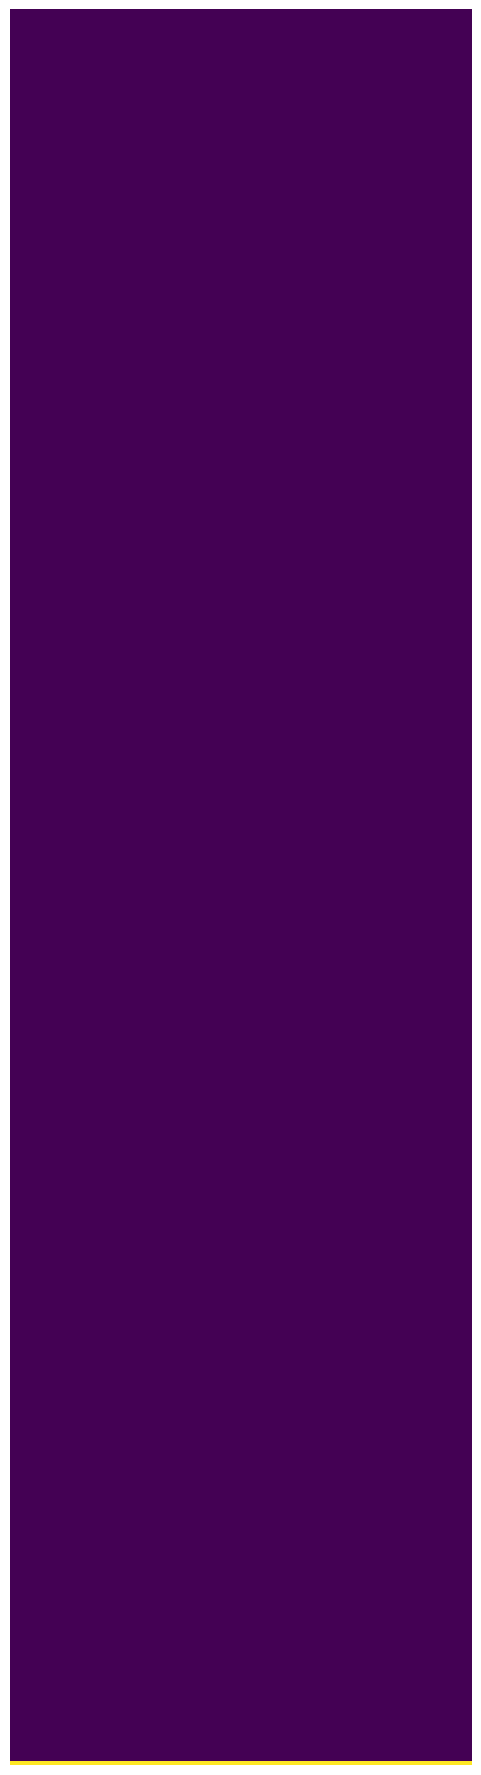

<Figure size 600x2280 with 0 Axes>

In [53]:
#test the display routine
display(A)

In [54]:
# To save computer time, we want to inject the new particle not too far
# above growing aggregate. We inject at on a line 'yStart', which
# keeps being increased so that it is always 'yBuffer' lines above the
# highest structure
yBuffer = 5
yStart  = 1 + yBuffer

i= 0	x=66	y=1	yStart=6
i= 1000	x=82	y=54	yStart=64
i= 2000	x=80	y=100	yStart=121
i= 3000	x=4	y=143	yStart=164
i= 4000	x=37	y=218	yStart=223
i= 5000	x=58	y=261	yStart=289
i= 6000	x=89	y=330	yStart=345
i= 7000	x=51	y=383	yStart=403
i= 8000	x=111	y=444	yStart=463
Structure reached Y limit after only 8207 particles


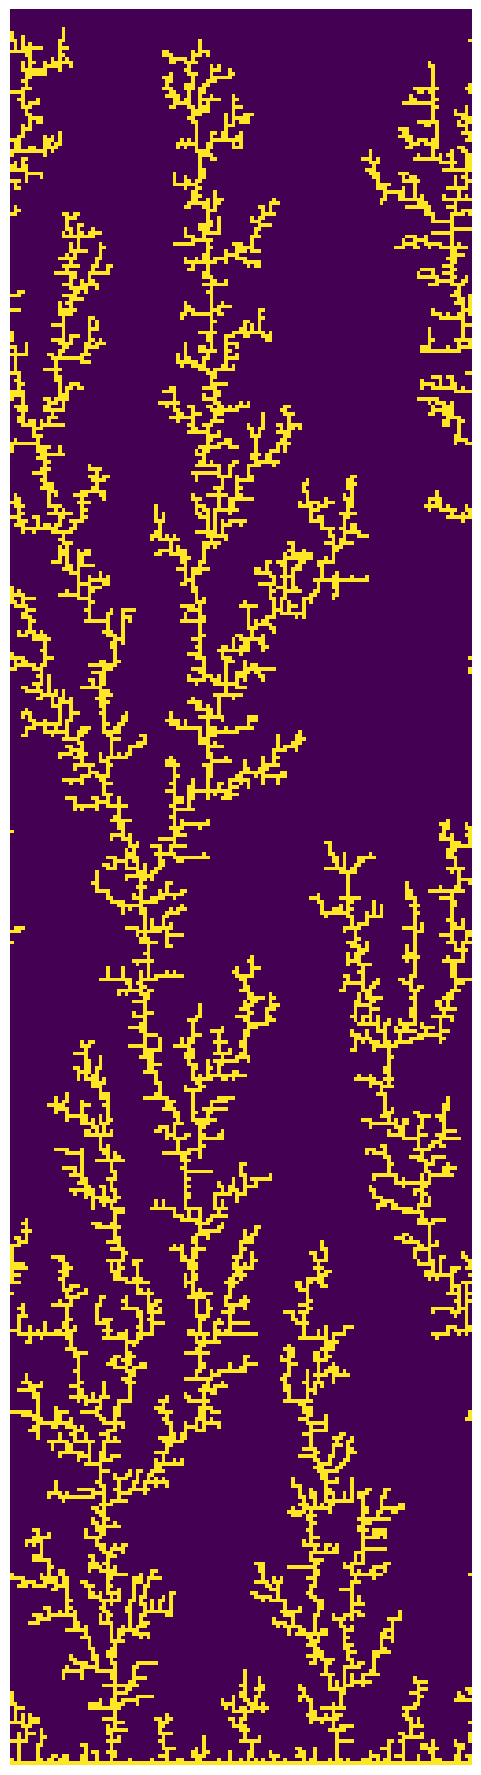

<Figure size 600x2280 with 0 Axes>

In [55]:
for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r < 0.25:
            x += 1
        elif r < 0.5:
            y += 1
        elif r < 0.75:
            x -= 1
        else:
            y -= 1
        
        #now apply periodic boundary conditions to 'x'
        if x < 0:
            x = maxX - 1
        if x >= maxX:
            x = 0
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        xp = (x + 1) % maxX
        xm = (x - 1) % maxX
        yp = min(y + 1, maxY - 1)
        ym = max(y - 1, 0)

        if (A[xp, y] == 1 or A[xm, y] == 1 or A[x, yp] == 1 or A[x, ym] == 1):
            A[x, y] = 1
            if (y + yBuffer > yStart and y + yBuffer < maxY):
                yStart = y + yBuffer

            if (i % 1000 == 0):
                print(f'i= {i}\tx={x}\ty={y}\tyStart={yStart}')

            #nNewParticlesPerFrame = 1000
            #if (i % nNewParticlesPerFrame == 0):
            #    display(A)

            break

    if (yStart + 1 == maxY):
        print(f'Structure reached Y limit after only {i} particles')
        break

display(A)
        

PART 2

In [56]:
yBuffer = 5
yStart  = 1 + yBuffer

nParticles = 10000
maxX = 400
maxY = 600
A = np.zeros((maxX, maxY))

# Introduce a sticky wall at the bottom 
# by filling the lowest row of pixels with particles
A[:,0] = 1
print(A.transpose())

[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


i= 0	x=69	y=1	yStart=6
i= 1000	x=249	y=35	yStart=51
i= 2000	x=153	y=99	yStart=110
i= 3000	x=76	y=182	yStart=190
i= 4000	x=15	y=243	yStart=255
i= 5000	x=337	y=320	yStart=327
i= 6000	x=281	y=394	yStart=405
i= 7000	x=208	y=481	yStart=491
i= 8000	x=103	y=556	yStart=568
Structure reached Y limit after only 8472 particles


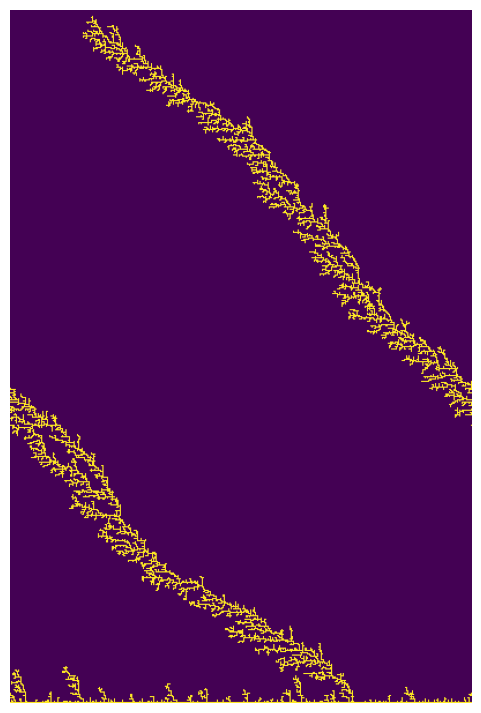

<Figure size 600x900 with 0 Axes>

In [57]:
for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r < 0.4:
            x += 1
        elif r < 0.5:
            x -= 1
        elif r < 0.75:
            y += 1
        else:
            y -= 1
        
        #now apply periodic boundary conditions to 'x'
        if x < 0:
            x = maxX - 1
        if x >= maxX:
            x = 0
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        xp = (x + 1) % maxX
        xm = (x - 1) % maxX
        yp = min(y + 1, maxY - 1)
        ym = max(y - 1, 0)

        if (A[xp, y] == 1 or A[xm, y] == 1 or A[x, yp] == 1 or A[x, ym] == 1):
            A[x, y] = 1
            if (y + yBuffer > yStart and y + yBuffer < maxY):
                yStart = y + yBuffer

            if (i % 1000 == 0):
                print(f'i= {i}\tx={x}\ty={y}\tyStart={yStart}')

            #nNewParticlesPerFrame = 1000
            #if (i % nNewParticlesPerFrame == 0):
            #    display(A)

            break

    if (yStart + 1 == maxY):
        print(f'Structure reached Y limit after only {i} particles')
        break

display(A)
        

Interestingly, the dendrites grow against the stream as they extend to the left even though the flow bias pushes particles to the right. This behavior resembles a stalagmite forming upward against the flow of dripping water. At first, this seems counterintuitive: one might expect that a rightward flow would cause particles to accumulate and grow faster in that direction. However, it makes sense when considering how particles actually attach. Since the stream carries particles from left to right, the left (upstream) side of the structure receives the most impacts, leading the dendrite to grow against the flow. The right side simply represents regions where particles drift away, effectively moving out of frame.

PART 3

In [58]:
yBuffer = 5
yStart  = 1 + yBuffer

nParticles = 10000
maxX = 200
maxY = 400
A = np.zeros((maxX, maxY))

# Introduce a sticky wall at the bottom 
# by filling the lowest row of pixels with particles
A[:,0] = 1

i= 0	x=72	y=1	yStart=6
i= 1000	x=30	y=12	yStart=23
i= 2000	x=141	y=31	yStart=38
i= 3000	x=31	y=41	yStart=54
i= 4000	x=31	y=50	yStart=69
i= 5000	x=39	y=59	yStart=85
i= 6000	x=34	y=85	yStart=101
i= 7000	x=80	y=109	yStart=122
i= 8000	x=20	y=125	yStart=138
i= 9000	x=139	y=148	yStart=158


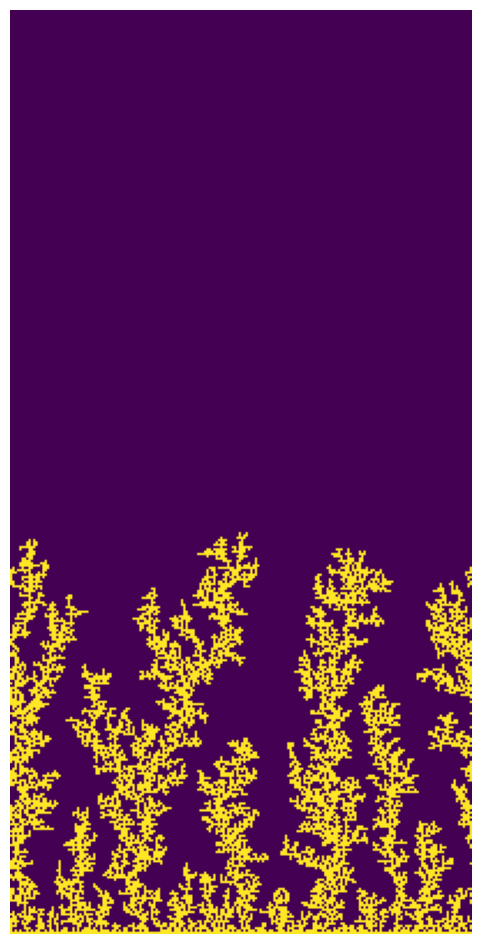

<Figure size 600x1200 with 0 Axes>

In [59]:
for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit

    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r < 0.25:
            x += 1
        elif r < 0.5:
            y += 1
        elif r < 0.75:
            x -= 1
        else:
            y -= 1
        
        #now apply periodic boundary conditions to 'x'
        if x < 0:
            x = maxX - 1
        if x >= maxX:
            x = 0
        
        if (A[x,y] == 1 or y>yStart): 
            x = xOrg
            y = yOrg
            continue; # if this site has been taken try moving in a different direction
        
        xp = (x + 1) % maxX
        xm = (x - 1) % maxX
        yp = min(y + 1, maxY - 1)
        ym = max(y - 1, 0)

        if (A[xp, y] == 1 or A[xm, y] == 1 or A[x, yp] == 1 or A[x, ym] == 1):
            
            r = np.random.random(); # Random float:  0.0 <= r < 1.0
            
            if r < 0.1:
                A[x, y] = 1
                if (y + yBuffer > yStart and y + yBuffer < maxY):
                    yStart = y + yBuffer

                if (i % 1000 == 0):
                    print(f'i= {i}\tx={x}\ty={y}\tyStart={yStart}')

                #nNewParticlesPerFrame = 1000
                #if (i % nNewParticlesPerFrame == 0):
                #    display(A)

                break

    if (yStart + 1 == maxY):
        print(f'Structure reached Y limit after only {i} particles')
        break

display(A)

When the sticking probability p is reduced, particles no longer attach immediately upon first contact with the cluster. Instead, they continue diffusing, which allows them to explore more of the surrounding space before eventually sticking. This means that instead of always attaching to the outermost tips of the existing dendrites, some particles can slip past those high points and settle deeper into the structure, filling in gaps that would otherwise remain empty. As a result, lowering p effectively shifts the average sticking location downward, producing a denser, more compact aggregate. In contrast, when p = 1, every collision leads to attachment, so growth occurs primarily at the exposed tips, leading to tall, branched, and more open structures.